In [2]:
import pandas as pd
import numpy as np

criação e importação do data frame de obesidade mundial dos anos 1975 a 2016

In [58]:
df_obesity=pd.read_csv('dados/obesity-cleaned.csv')
df_obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


Observando o tipo de dados de cada coluna.

In [5]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


Limpeza dos dados e tranformações necessárias para melhor obter algumas perguntas.

In [9]:
df_obesity['Obesity (%)'][0]   #os dados da coluna estão em formato de string


'0.5 [0.2-1.1]'

In [11]:
df_obesity['Obesity (%)'].value_counts()  #existe valores em alguns países que foram impossíveis
                                          #de serem coletados, no caso 504


No data             504
0.4 [0.1-1.0]        55
0.6 [0.2-1.3]        47
0.3 [0.1-0.8]        46
0.3 [0.1-0.7]        46
                   ... 
8.4 [4.9-12.8]        1
7.4 [3.9-12.1]        1
32.9 [25.8-40.2]      1
5.8 [3.7-8.3]         1
21.3 [17.7-25.2]      1
Name: Obesity (%), Length: 16375, dtype: int64

In [59]:
del df_obesity['Unnamed: 0']   # deletando a coluna 


In [60]:
df_obesity['Obesity']=df_obesity['Obesity (%)'].apply(lambda x:x.split()[0]) #criando uma nova coluna obesity
df_obesity['Obesity'].head()

0    0.5
1    0.2
2    0.8
3    0.5
4    0.2
Name: Obesity, dtype: object

In [61]:
df_obesity.loc[df_obesity['Obesity']=='No','Obesity']=np.nan # substituindo os valores
df_obesity['Obesity']=df_obesity['Obesity'].dropna()  #deletando os valores (nan)
df_obesity['Obesity']=df_obesity['Obesity'].apply(lambda x:float(x)) #  transformando os da coluna valores em float

Agora vamos fazer algumas perguntas sobre os dados, qual o percentual médio de obesidade mundial
no ano de 2015 ?

In [62]:
df_obesity[df_obesity.Year==2015].groupby('Sex').mean()

,Year,Obesity
Sex,,
Both sexes,2015,19.508377
Female,2015,22.899476
Male,2015,15.980628


Quais são os 5 países com maior e menor taxa de aumento nos índices obesidade no período observado ?

In [70]:

#df_obesity.set_index("Year",inplace=True)

df_obesity_start=df_obesity[df_obesity.index==1975] #fixando período de inicial
df_obesity_end=df_obesity[df_obesity.index==2016] #fixando período de final


df_obesity_start.set_index("Country",inplace=True)  #setando a coluna Country como index 
df_obesity_end.set_index("Country",inplace=True)  #setando a coluna Country como index 
  
df_obesity_env=df_obesity_end[df_obesity_end['Sex']=='Both sexes']['Obesity']-df_obesity_start[df_obesity_start['Sex']=='Both sexes']['Obesity']

df_obesity_env   #taxa de obesidade dos paises

Country
Afghanistan                            5.0
Albania                               15.2
Algeria                               20.5
Andorra                               12.7
Angola                                 7.4
                                      ... 
Venezuela (Bolivarian Republic of)    16.0
Viet Nam                               2.0
Yemen                                 14.3
Zambia                                 6.6
Zimbabwe                              11.8
Name: Obesity, Length: 195, dtype: float64

Agora basta ordenar os valores que vamos obter os 5 países com maior e menor taxas

In [73]:
df_obesity_env.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [74]:
df_obesity_env.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

Qual o país com nível percentual médio em 2015 ?

In [79]:
df_2015=df_obesity[df_obesity.index==2015]
df_2015[df_2015['Obesity']==df_2015['Obesity'].max()]

   

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


Qual a diferença média percentual de obesidade entre os sexos no brasil no período ?

In [84]:
df_brasil=df_obesity[df_obesity['Country']=='Brazil']
df_brasil[df_brasil['Sex']=='Female']['Obesity']-df_brasil[df_brasil['Sex']=='Male']['Obesity'] # observação nos próximos 
                                                                                                #utilizaremos gráficos
                                                                                                #para facilitar visualização

Year
1975    4.3
1976    4.4
1977    4.6
1978    4.7
1979    4.9
1980    4.9
1981    5.1
1982    5.2
1983    5.4
1984    5.5
1985    5.6
1986    5.7
1987    5.8
1988    5.9
1989    6.0
1990    6.1
1991    6.1
1992    6.3
1993    6.3
1994    6.4
1995    6.4
1996    6.5
1997    6.6
1998    6.7
1999    6.8
2000    6.8
2001    6.8
2002    6.8
2003    6.9
2004    6.9
2005    6.9
2006    6.9
2007    7.0
2008    6.9
2009    7.0
2010    7.0
2011    6.9
2012    6.9
2013    6.9
2014    6.9
2015    6.9
2016    6.9
Name: Obesity, dtype: float64

Construindo um gráfico para verificar a evolução  do percentual da obesidade no mundo de ambos os sexos.

In [ ]:
import matplotlib

<AxesSubplot:xlabel='Year'>

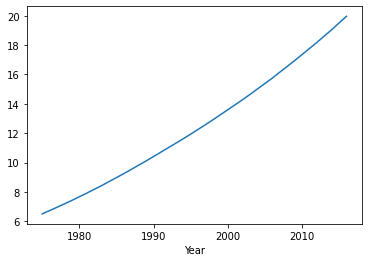

In [86]:
df_ambos=df_obesity[df_obesity['Sex']=='Both sexes']
df_ambos.groupby('Year')['Obesity'].mean().plot()